In [140]:
import pandas as pd


import time
import warnings

warnings.filterwarnings('ignore')

In [141]:
pd.options.display.max_columns = 999

In [142]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [143]:
train.columns

Index(['ID', 'Date', 'Temperature', 'Humidity', 'Operator', 'Measure1',
       'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7',
       'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12',
       'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure',
       'Failure', '?Date.year', '?Date.month', '?Date.day-of-month',
       '?Date.day-of-week', '?Date.hour', '?Date.minute', '?Date.second'],
      dtype='object')

In [144]:
test.columns

Index(['ID', 'Date', 'Temperature', 'Humidity', 'Operator', 'Measure1',
       'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7',
       'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12',
       'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure',
       '?Date.year', '?Date.month', '?Date.day-of-month', '?Date.day-of-week',
       '?Date.hour', '?Date.minute', '?Date.second'],
      dtype='object')

In [145]:
train.Failure.value_counts()

No     7830
Yes      75
Name: Failure, dtype: int64

In [146]:
print('Ratio of Failure', round(train.Failure.value_counts()[1]/len(train) * 100, 2), '%')

Ratio of Failure 0.95 %


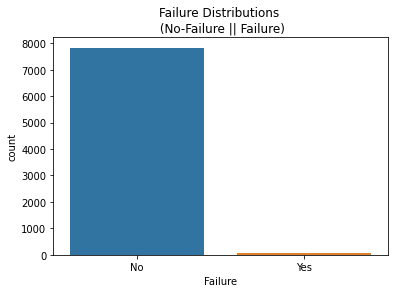

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('Failure', data=train)
plt.title('Failure Distributions \n (No-Failure || Failure)', fontsize=12);

In [148]:
# 라벨 인코더 사용

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['Failure'])
train['failure'] = le.transform(train['Failure'])
train.head()

,ID,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,?Date.year,?Date.month,?Date.day-of-month,?Date.day-of-week,?Date.hour,?Date.minute,?Date.second,failure
0,1,01-01-2016 00:00,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No,2016,1,1,5,0,0,0,0
1,2,01-01-2016 01:00,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No,2016,1,1,5,1,0,0,0
2,3,01-01-2016 02:00,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No,2016,1,1,5,2,0,0,0
3,4,01-01-2016 03:00,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No,2016,1,1,5,3,0,0,0
4,5,01-01-2016 04:00,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No,2016,1,1,5,4,0,0,0


In [258]:
op = train[['Operator','failure']]
failure_op = op.groupby(['Operator','failure']).agg({'Operator': 'count'})
op_count = op.groupby(['Operator']).agg('count')
op_failure = failure_op.div(op_count, level='Operator') * 100
failure_op.div(op_count, level='Operator')

#op.groupby('Operator').Failure.value_counts()

Operator  failure
Operator  failure                   
Operator1 0             NaN      NaN
          1             NaN      NaN
Operator2 0             NaN      NaN
          1             NaN      NaN
Operator3 0             NaN      NaN
          1             NaN      NaN
Operator4 0             NaN      NaN
          1             NaN      NaN
Operator5 0             NaN      NaN
          1             NaN      NaN
Operator6 0             NaN      NaN
          1             NaN      NaN
Operator7 0             NaN      NaN
          1             NaN      NaN
Operator8 0             NaN      NaN
          1             NaN      NaN

In [149]:
# 변수 분리
features = train[[ 'Temperature', 'Humidity','Measure1',
       'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7',
       'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12',
       'Measure13', 'Measure14', 'Measure15']]
failure = train[['failure']]

features.shape, failure.shape

((7905, 17), (7905, 1))

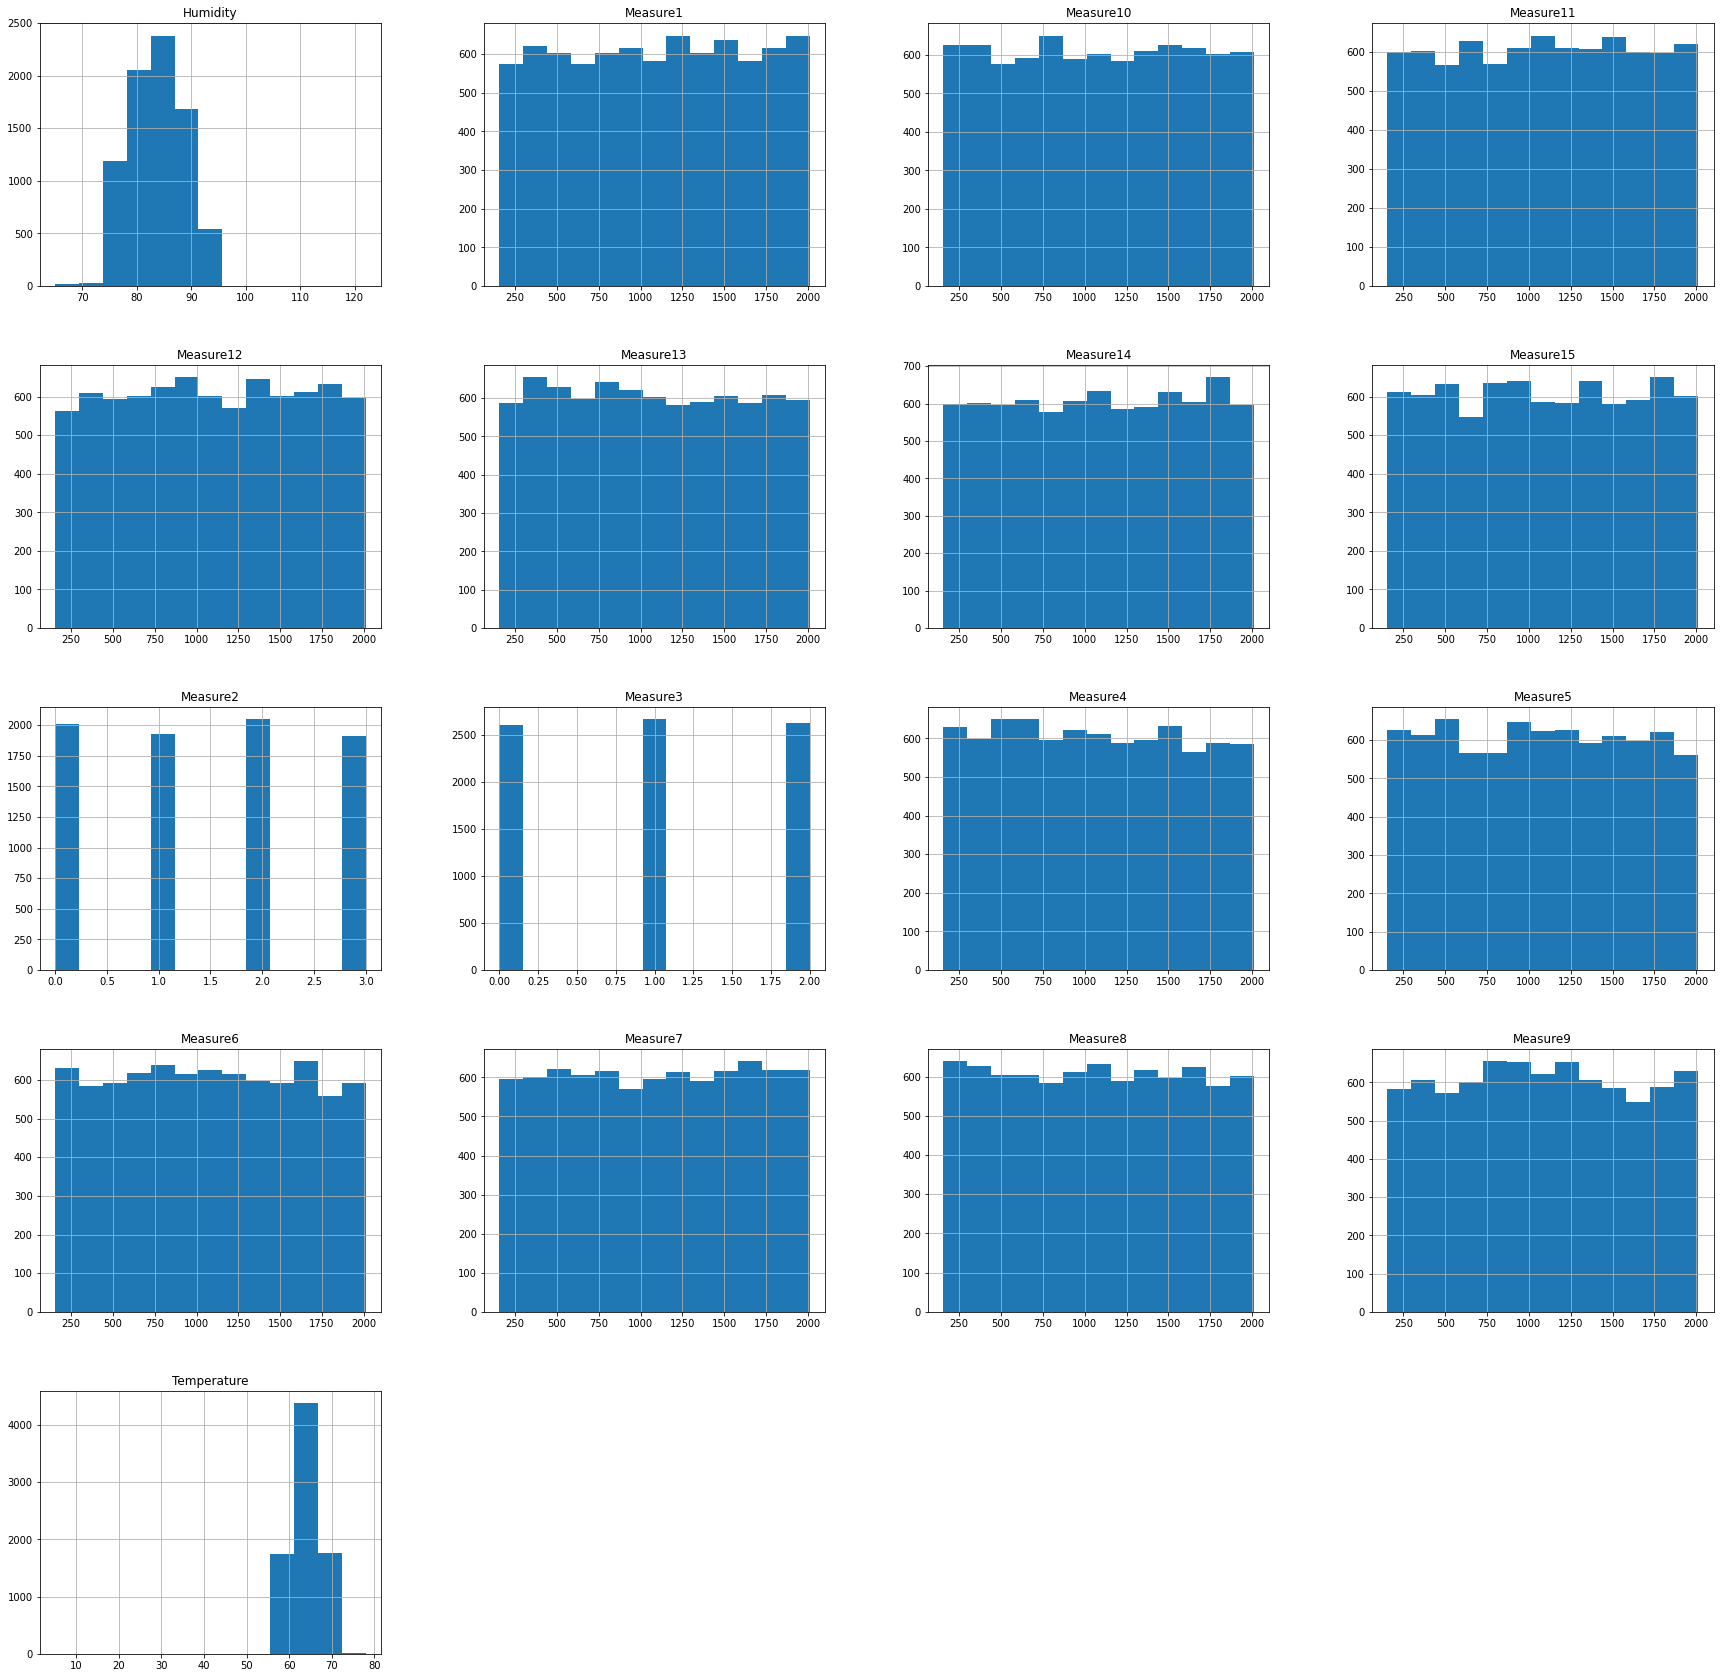

In [150]:
features.hist(bins=13, figsize=(30,30));

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, failure, test_size=0.2, random_state=13, stratify=failure)

In [152]:
# 트레인 데이터 불균형도 확인
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1]), array([6264,   60]))

In [153]:
tmp = np.unique(y_train, return_counts=True)[1]
print(round(tmp[1]/len(y_train) *100,2) ,'%')

0.95 %


In [154]:
# 테스트 데이터 불균형 확인

np.unique(y_test, return_counts=True)

(array([0, 1]), array([1566,   15]))

In [155]:
tmp = np.unique(y_test, return_counts=True)[1]
print(round(tmp[1]/len(y_test) *100,2) ,'%')

0.95 %


예측

In [156]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    acu = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, acu

In [157]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('confusion matrix')
    print(confusion)
    
    print('Accuracy: {0:.4f}, precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

Logistic

In [158]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=34, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

confusion matrix
[[1565    1]
 [   5   10]]
Accuracy: 0.9962, precision: 0.9091
Recall: 0.6667, F1: 0.7692, AUC: 0.8330


DecisionTree

In [159]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=34, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf. predict(X_test)

print_clf_eval(y_test, dt_pred)

confusion matrix
[[1560    6]
 [   1   14]]
Accuracy: 0.9956, precision: 0.7000
Recall: 0.9333, F1: 0.8000, AUC: 0.9648


RandomForestClassifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

confusion matrix
[[1562    4]
 [   2   13]]
Accuracy: 0.9962, precision: 0.7647
Recall: 0.8667, F1: 0.8125, AUC: 0.9321


GBM

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=34)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print_clf_eval(y_test, gb_pred)
print('fit_time : ', time.time() - start_time)

confusion matrix
[[1557    9]
 [   1   14]]
Accuracy: 0.9937, precision: 0.6087
Recall: 0.9333, F1: 0.7368, AUC: 0.9638
fit_time :  1.6318702697753906


In [162]:
gb_clf.n_estimators_

100

GBM Grid Search

In [163]:
## 그리드 서치

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 200, 300, 400, 500, 1000],
    'learning_rate' : [0.01, 0.05, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print('Fit time: ', time.time() - start_time)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.1min finished


Fit time:  67.59196615219116


In [164]:
grid.best_score_

0.9960465552609197

In [165]:
print_clf_eval(y_test, grid.best_estimator_.predict(X_test))

confusion matrix
[[1562    4]
 [   2   13]]
Accuracy: 0.9962, precision: 0.7647
Recall: 0.8667, F1: 0.8125, AUC: 0.9321


XGBoost

In [166]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
print('Fit time: ', time.time() - start_time)

Fit time:  0.4610896110534668


In [167]:
print_clf_eval(y_test, xgb.predict(X_test))

confusion matrix
[[1564    2]
 [   1   14]]
Accuracy: 0.9981, precision: 0.8750
Recall: 0.9333, F1: 0.9032, AUC: 0.9660


LGBMClassifier

In [168]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=128, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)


confusion matrix
[[1565    1]
 [   4   11]]
Accuracy: 0.9968, precision: 0.9167
Recall: 0.7333, F1: 0.8148, AUC: 0.8663


모델, 데이터 정리. 모델 성능 정리 df로 만들기


In [169]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [170]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [171]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf, xgb, gb_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost', 'GradientBoosting']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results.sort_values('accuracy', ascending=False)

Fit time:  3.6878957748413086


,accuracy,precision,recall,f1,roc_auc
XGBoost,0.998102,0.875000,0.933333,0.903226,0.966028
LightGBM,0.996837,0.916667,0.733333,0.814815,0.866347
LogisticReg,0.996205,0.909091,0.666667,0.769231,0.833014
RandomForest,0.996205,0.764706,0.866667,0.812500,0.932056
DecisionTree,0.995572,0.700000,0.933333,0.800000,0.964751
GradientBoosting,0.993675,0.608696,0.933333,0.736842,0.963793


In [172]:
results.sort_values('precision', ascending=False)

,accuracy,precision,recall,f1,roc_auc
LightGBM,0.996837,0.916667,0.733333,0.814815,0.866347
LogisticReg,0.996205,0.909091,0.666667,0.769231,0.833014
XGBoost,0.998102,0.875000,0.933333,0.903226,0.966028
RandomForest,0.996205,0.764706,0.866667,0.812500,0.932056
DecisionTree,0.995572,0.700000,0.933333,0.800000,0.964751
GradientBoosting,0.993675,0.608696,0.933333,0.736842,0.963793


In [173]:
results.sort_values('recall', ascending=False)

,accuracy,precision,recall,f1,roc_auc
DecisionTree,0.995572,0.700000,0.933333,0.800000,0.964751
XGBoost,0.998102,0.875000,0.933333,0.903226,0.966028
GradientBoosting,0.993675,0.608696,0.933333,0.736842,0.963793
RandomForest,0.996205,0.764706,0.866667,0.812500,0.932056
LightGBM,0.996837,0.916667,0.733333,0.814815,0.866347
LogisticReg,0.996205,0.909091,0.666667,0.769231,0.833014


ROC 커브

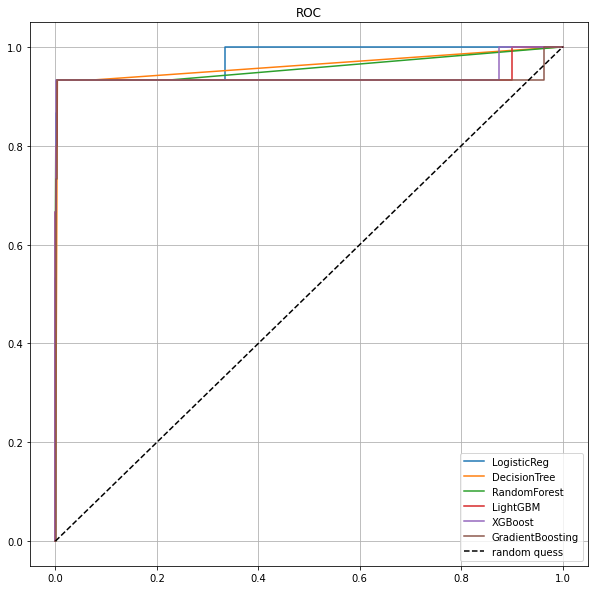

In [174]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize = (10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0,1], [0,1], 'k--', label = 'random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()
    
    
draw_roc_curve(models,model_names, X_test, y_test)
        
        
        

Five-cross Validation

In [175]:
from sklearn.model_selection import KFold, cross_val_score, KFold

results = []
cv_result = []

def cross_model(models):
    for model in models:
        kfold = KFold(n_splits=5, random_state=34, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)

    return results

In [176]:
cross_result = cross_model(models)

In [177]:
cross_total_result = pd.DataFrame(cross_result, index=model_names)
cross_total_result['mean'] = cross_total_result.mean(axis=1)
cross_total_result.sort_values('mean', ascending=False)

,0,1,2,3,4,mean
RandomForest,0.995257,0.994466,0.996838,0.996047,0.998418,0.996205
DecisionTree,0.995257,0.992885,0.997628,0.996047,0.998418,0.996047
XGBoost,0.995257,0.992885,0.997628,0.995257,0.998418,0.995889
LogisticReg,0.995257,0.992095,0.997628,0.996838,0.996835,0.995731
GradientBoosting,0.996838,0.992095,0.996047,0.995257,0.996835,0.995415
LightGBM,0.993676,0.992095,0.997628,0.995257,0.997627,0.995257


이상치 확인

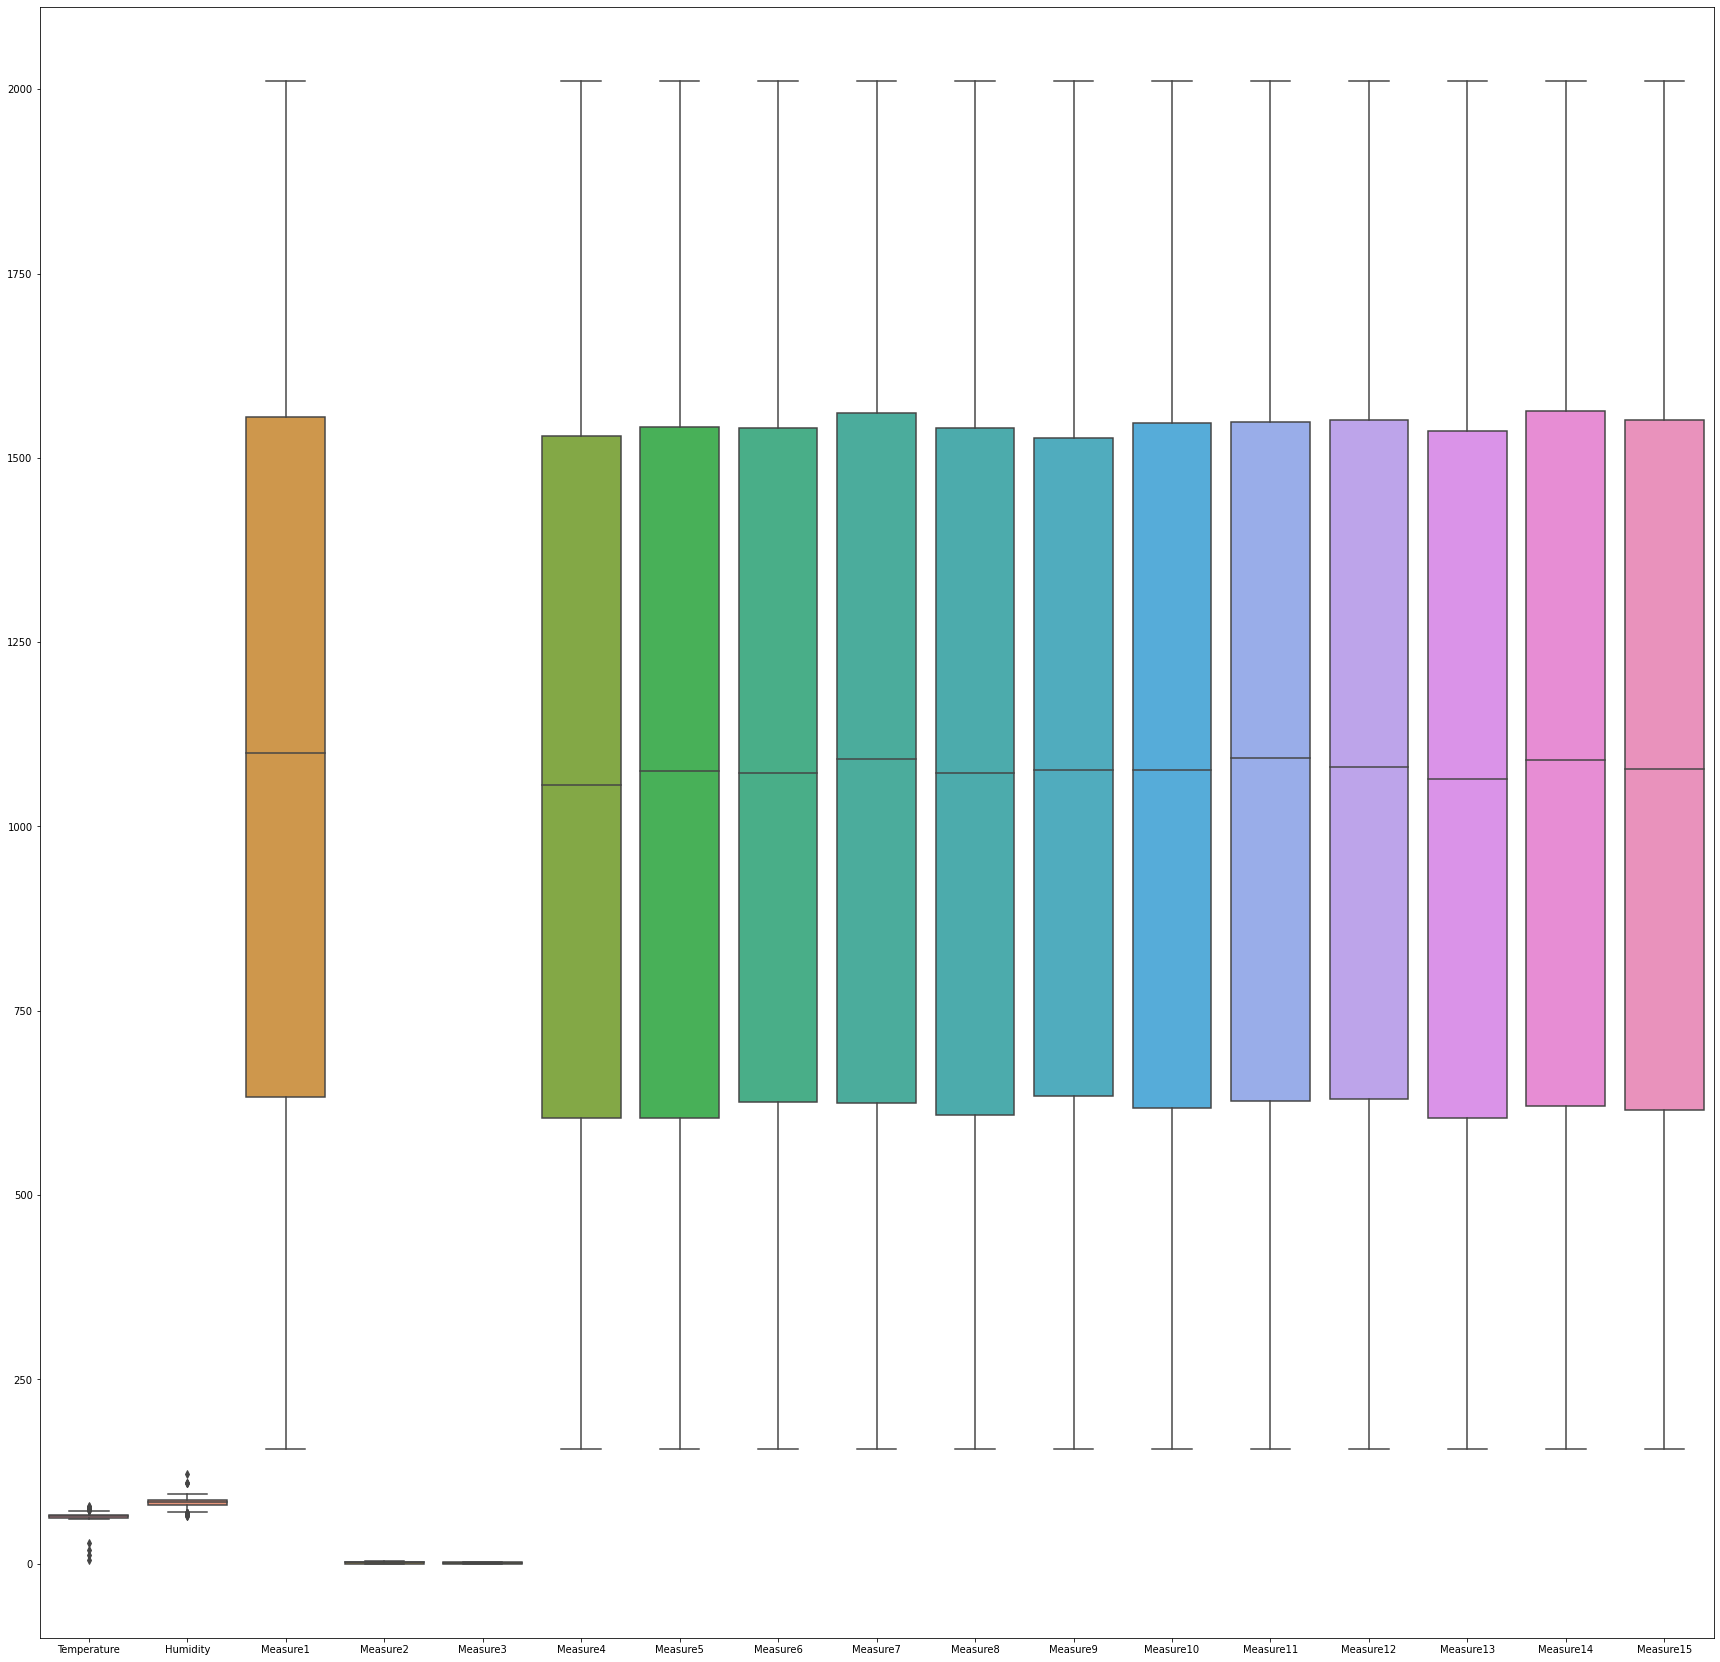

In [178]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.boxplot(data = features)

이상치보다 스케일링

In [179]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

MMS.fit(features)
SS.fit(features)

features_MMS = MMS.transform(features)
features_SS = SS.transform(features)

In [180]:
features_MMS_pd = pd.DataFrame(features_MMS, columns=features.columns)
features_SS_pd = pd.DataFrame(features_SS, columns=features.columns)

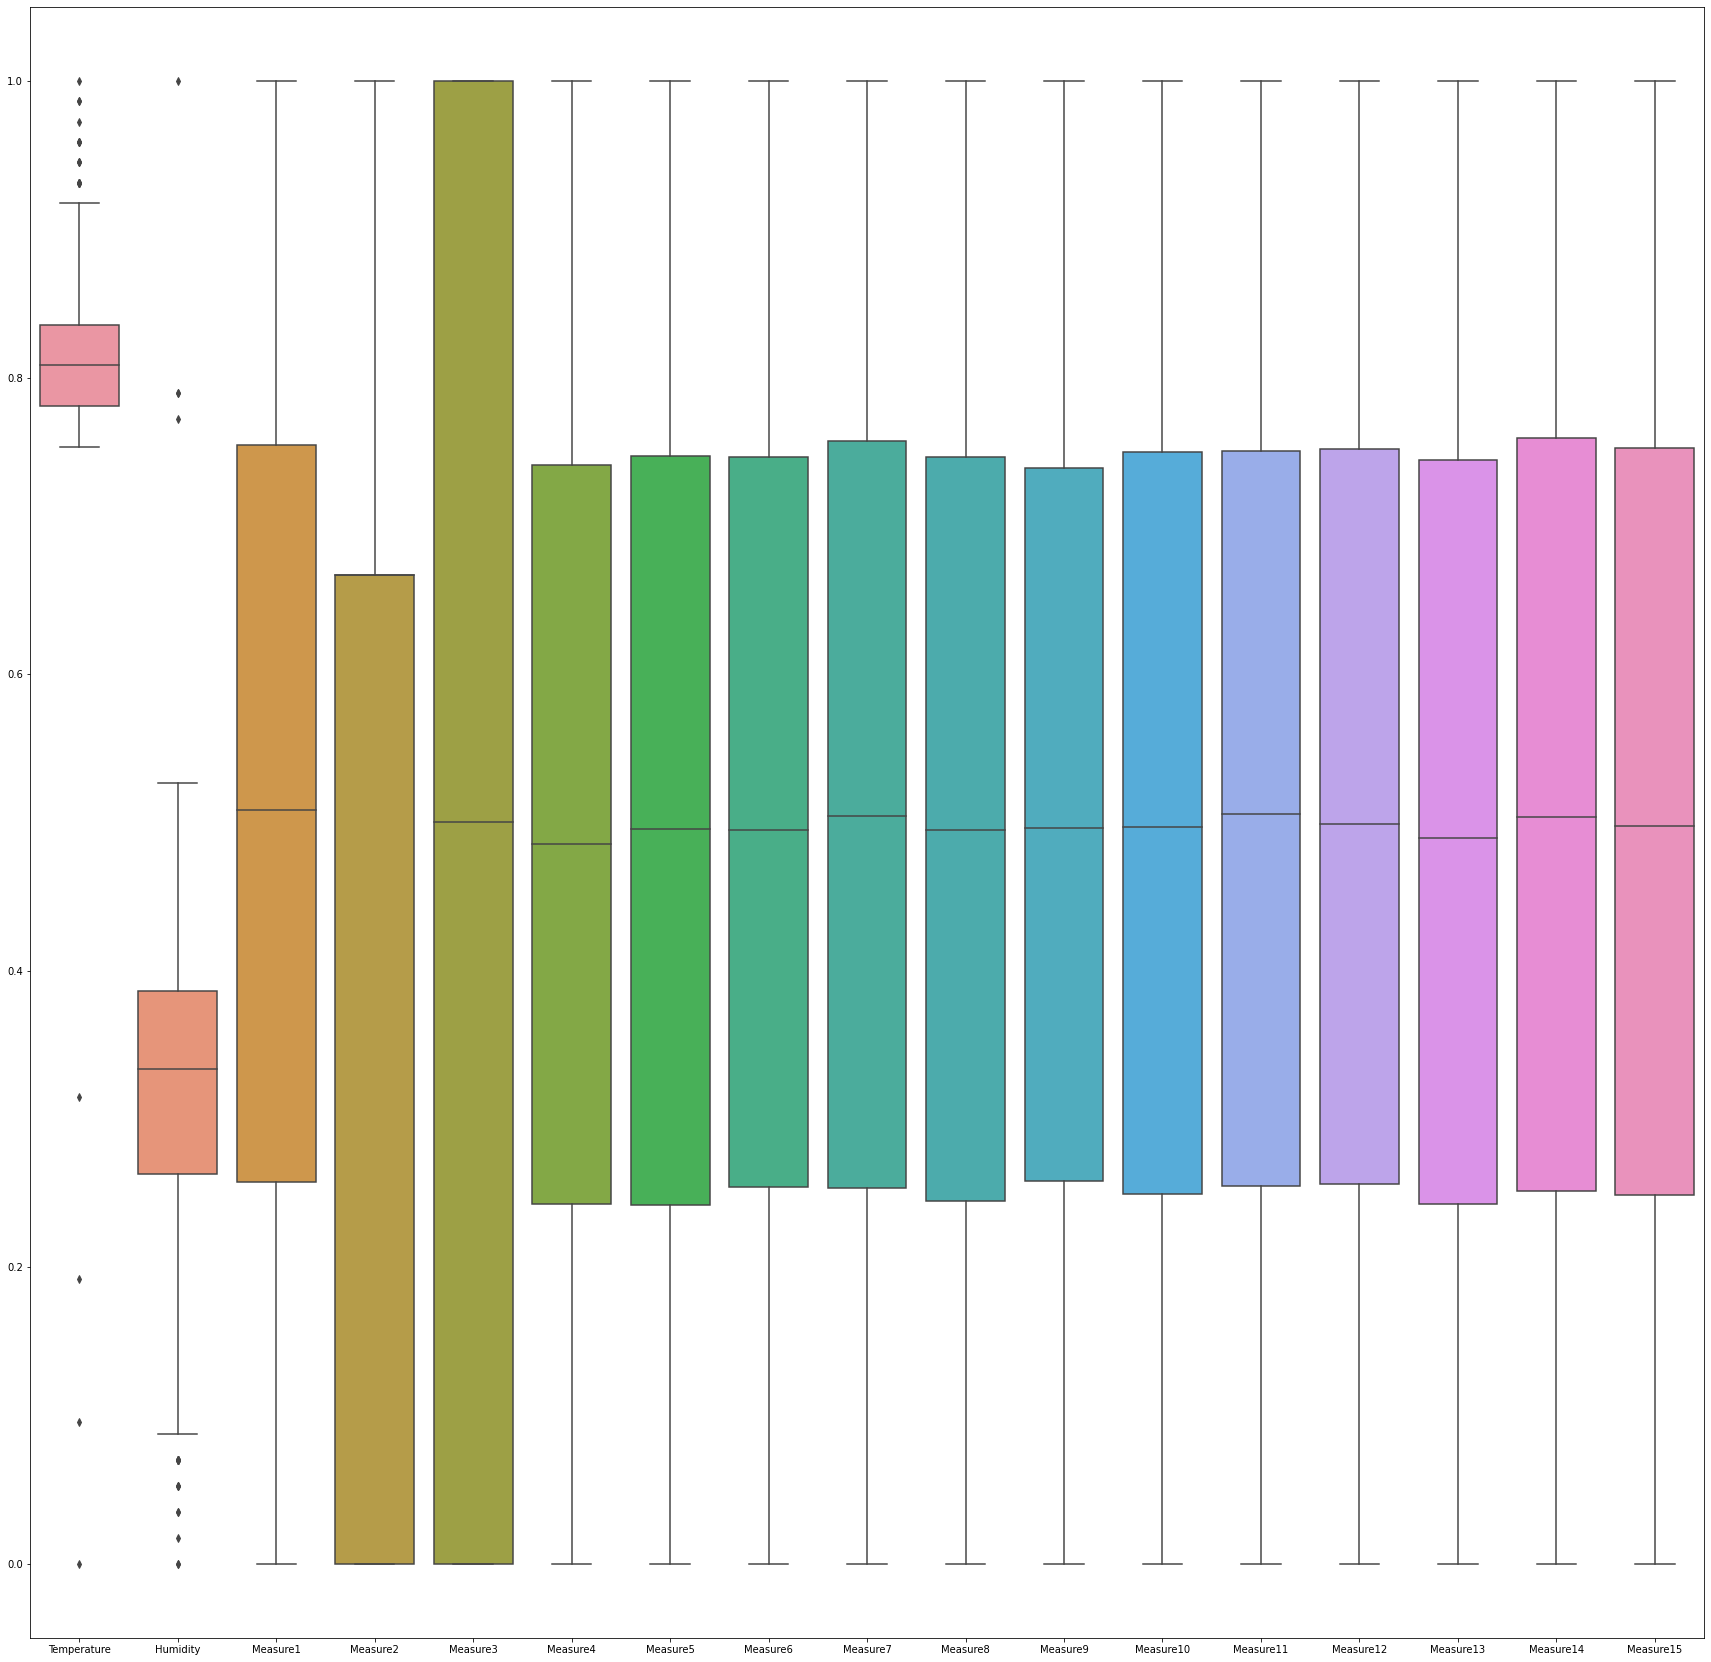

In [181]:
# minmax scaler
import seaborn as sns

plt.figure(figsize=(30,30))
sns.boxplot(data = features_MMS_pd);

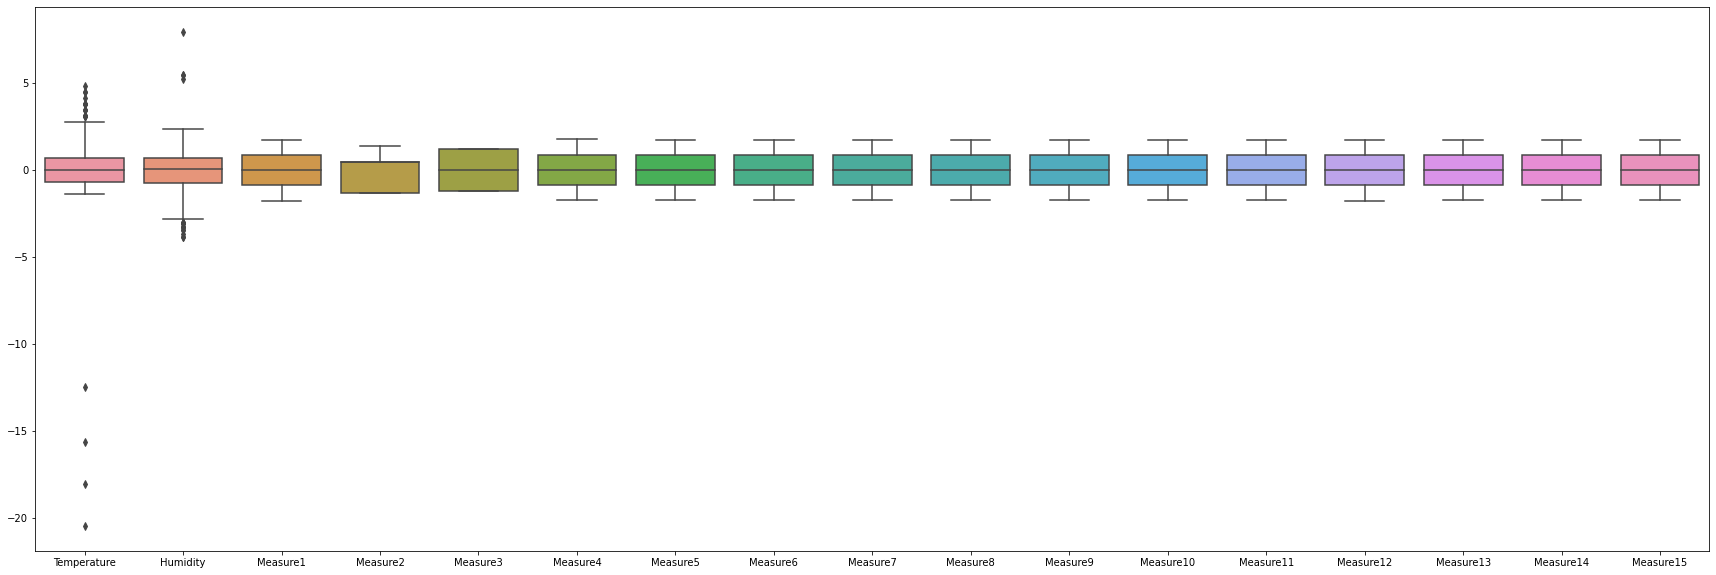

In [182]:
# standard scaler
import seaborn as sns

plt.figure(figsize=(30,10))
sns.boxplot(data = features_SS_pd);

In [183]:
# MMS 데이터 나누고 결과 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_MMS_pd, failure, test_size=0.2, random_state=13, stratify=failure)

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results.sort_values('accuracy', ascending=False)

Fit time:  3.487234115600586


,accuracy,precision,recall,f1,roc_auc
XGBoost,0.998102,0.875000,0.933333,0.903226,0.966028
LightGBM,0.997470,0.923077,0.800000,0.857143,0.899681
RandomForest,0.996205,0.764706,0.866667,0.812500,0.932056
DecisionTree,0.995572,0.700000,0.933333,0.800000,0.964751
GradientBoosting,0.993675,0.608696,0.933333,0.736842,0.963793
LogisticReg,0.990512,0.000000,0.000000,0.000000,0.500000


In [184]:
# SS 데이터 나누고 결과 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_SS_pd, failure, test_size=0.2, random_state=13, stratify=failure)

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results.sort_values('accuracy', ascending=False)

Fit time:  3.370455741882324


,accuracy,precision,recall,f1,roc_auc
XGBoost,0.998102,0.875000,0.933333,0.903226,0.966028
LightGBM,0.996837,0.916667,0.733333,0.814815,0.866347
RandomForest,0.996205,0.764706,0.866667,0.812500,0.932056
LogisticReg,0.995572,0.900000,0.600000,0.720000,0.799681
DecisionTree,0.995572,0.700000,0.933333,0.800000,0.964751
GradientBoosting,0.993675,0.608696,0.933333,0.736842,0.963793


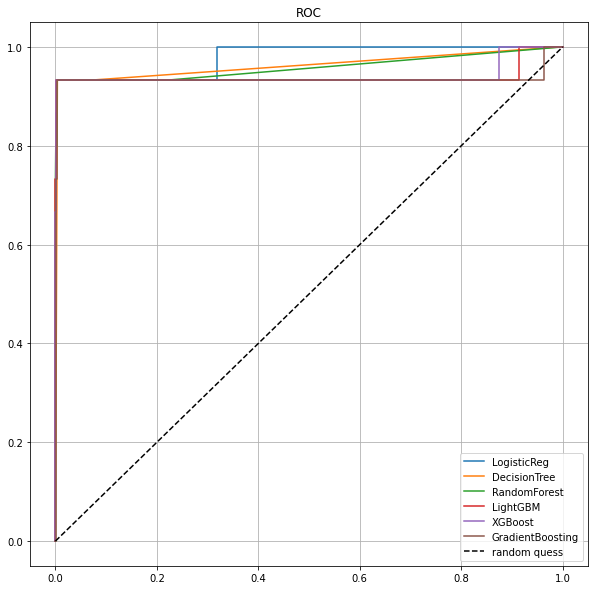

In [185]:
draw_roc_curve(models , model_names, X_test, y_test)

Over & Under Sampling

Fail 데이터가 적음

In [186]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=34)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [187]:
X_train.shape, y_train.shape

((6324, 17), (6324, 1))

In [188]:
X_train_over.shape, y_train_over.shape

((12528, 17), (12528, 1))

In [189]:
# fail 증폭
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1]), array([6264,   60]))
(array([0, 1]), array([6264, 6264]))


In [190]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf, xgb, gb_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost', 'GradientBoosting']

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results.sort_values('accuracy', ascending=False)

Fit time:  7.427216053009033


,accuracy,precision,recall,f1,roc_auc
RandomForest,0.997470,0.823529,0.933333,0.875000,0.965709
LightGBM,0.996837,0.777778,0.933333,0.848485,0.965390
GradientBoosting,0.996837,0.777778,0.933333,0.848485,0.965390
DecisionTree,0.996205,0.736842,0.933333,0.823529,0.965070
XGBoost,0.996205,0.764706,0.866667,0.812500,0.932056
LogisticReg,0.901961,0.083333,0.933333,0.153005,0.917497


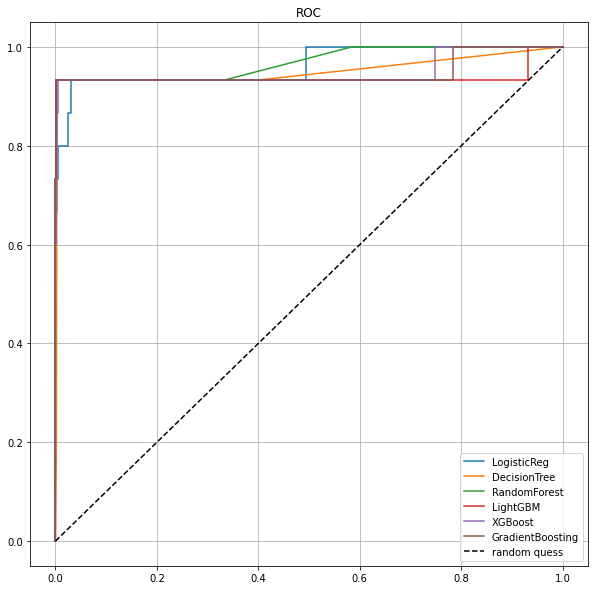

In [191]:
draw_roc_curve(models , model_names, X_test, y_test)

테스트 적용

In [192]:
features_test = test[[ 'Temperature', 'Humidity','Measure1',
       'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7',
       'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12',
       'Measure13', 'Measure14', 'Measure15']]

In [193]:
test['Failure'] = xgb.predict(features_test)

In [194]:
test.loc[test.Failure == 0, 'Failure'] = 'No'
test.loc[test.Failure == 1, 'Failure'] = 'Yes'


#people.loc[people.GENDER==2, 'GENDER'] = '여'


In [195]:
result_test = test[['ID','Failure']]

In [197]:
result_test.to_csv('submisson.csv')